# Steam Engagement Thesis

## Week 1 - Dataset Inspection

### 1. Load and Inspect the Dataset

In [71]:
import pandas as pd

df = pd.read_csv("games.csv")

df.shape
df.columns
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 122611 entries, 2539430 to 4141790
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AppID                       122610 non-null  object 
 1   Name                        122611 non-null  object 
 2   Release date                122611 non-null  object 
 3   Estimated owners            122611 non-null  int64  
 4   Peak CCU                    122611 non-null  int64  
 5   Required age                122611 non-null  float64
 6   Price                       122611 non-null  int64  
 7   DiscountDLC count           122611 non-null  int64  
 8   About the game              114162 non-null  object 
 9   Supported languages         122611 non-null  object 
 10  Full audio languages        122611 non-null  object 
 11  Reviews                     12070 non-null   object 
 12  Header image                122530 non-null  object 
 13  Website     

,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Movies
count,1.226110e+05,122611.000000,122611.000000,122611.000000,122611.000000,122611.000000,122611.000000,1.226110e+05,1.226110e+05,40.000000,122611.000000,1.226110e+05,1.226110e+05,122611.000000,1.226110e+05,122611.000000,0.0
mean,5.459332e+01,0.167611,4.765091,18.353663,0.545856,2.564941,0.024549,1.044986e+03,1.691974e+02,99.175000,18.087015,9.618250e+02,2.080232e+02,13.789268,1.735705e+02,14.722170,NaN
std,3.729452e+03,1.653591,12.531030,28.858970,14.516026,13.660559,1.394901,2.809173e+04,5.374645e+03,0.675107,141.493879,2.187880e+04,1.121768e+04,270.378053,1.120254e+04,294.509615,NaN
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,98.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
25%,0.000000e+00,0.000000,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,99.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
50%,0.000000e+00,0.000000,2.240000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000e+00,99.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
75%,0.000000e+00,0.000000,5.240000,40.000000,0.000000,0.000000,0.000000,3.700000e+01,1.000000e+01,100.000000,19.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,NaN
max,1.013936e+06,21.000000,999.980000,100.000000,3703.000000,97.000000,100.000000,7.642084e+06,1.173003e+06,100.000000,9821.000000,4.830455e+06,3.429544e+06,20088.000000,3.429544e+06,20088.000000,NaN


In [72]:
print("Dataset Shape:", df.shape)
print("\nColumn Types:")
print(df.dtypes.value_counts())

Dataset Shape: (122611, 39)

Column Types:
object     19
int64      14
float64     3
bool        3
Name: count, dtype: int64


### 2. Identify Key Variables

In [73]:
# Clean Column Names
df.columns = df.columns.str.lower().str.replace(" ","_")
df.columns

Index(['appid', 'name', 'release_date', 'estimated_owners', 'peak_ccu',
       'required_age', 'price', 'discountdlc_count', 'about_the_game',
       'supported_languages', 'full_audio_languages', 'reviews',
       'header_image', 'website', 'support_url', 'support_email', 'windows',
       'mac', 'linux', 'metacritic_score', 'metacritic_url', 'user_score',
       'positive', 'negative', 'score_rank', 'achievements', 'recommendations',
       'notes', 'average_playtime_forever', 'average_playtime_two_weeks',
       'median_playtime_forever', 'median_playtime_two_weeks', 'developers',
       'publishers', 'categories', 'genres', 'tags', 'screenshots', 'movies'],
      dtype='object')

In [74]:
# Automatically identify variable types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("\nCategorical Columns:", categorical_cols)
print("\nBoolean Columns:", bool_cols)

Numeric Columns: ['estimated_owners', 'peak_ccu', 'required_age', 'price', 'discountdlc_count', 'metacritic_score', 'user_score', 'positive', 'negative', 'score_rank', 'achievements', 'recommendations', 'average_playtime_forever', 'average_playtime_two_weeks', 'median_playtime_forever', 'median_playtime_two_weeks', 'movies']

Categorical Columns: ['appid', 'name', 'release_date', 'about_the_game', 'supported_languages', 'full_audio_languages', 'reviews', 'header_image', 'website', 'support_url', 'support_email', 'metacritic_url', 'notes', 'developers', 'publishers', 'categories', 'genres', 'tags', 'screenshots']

Boolean Columns: ['windows', 'mac', 'linux']


In [75]:
# Define engagement variables
early_engagement = [
    "average_playtime_two_weeks",
    "median_playtime_two_weeks"
]

long_term_engagement = [
    "average_playtime_forever",
    "median_playtime_forever"
]

print("Early Engagement Variables:", early_engagement)
print("Long-Term Engagement Variables:", long_term_engagement)

Early Engagement Variables: ['average_playtime_two_weeks', 'median_playtime_two_weeks']
Long-Term Engagement Variables: ['average_playtime_forever', 'median_playtime_forever']


In [76]:
# confirming they exist
for col in early_engagement + long_term_engagement:
    print(col, "exists:", col in df.columns)

average_playtime_two_weeks exists: True
median_playtime_two_weeks exists: True
average_playtime_forever exists: True
median_playtime_forever exists: True


In [77]:
# Define static game attributes
static_attributes = [
    'price',
    'required_age',
    'genres',
    'categories',
    'developers',
    'publishers',
    'windows',
    'mac',
    'linux',
    'metacritic_score',
    'user_score'
]

print("Static Attributes:")
for col in static_attributes:
    print(col, "exists:", col in df.columns)

Static Attributes:
price exists: True
required_age exists: True
genres exists: True
categories exists: True
developers exists: True
publishers exists: True
windows exists: True
mac exists: True
linux exists: True
metacritic_score exists: True
user_score exists: True


In [78]:
# Define early signals beyond playtime
early_signals = [
    'peak_ccu',
    'positive',
    'negative',
    'reccomendations',
    'estimated_owners',
    'achievments'
]

print("Early Signal Variables:")
for col in early_signals:
    print(col, "exists:", col in df.columns)

Early Signal Variables:
peak_ccu exists: True
positive exists: True
negative exists: True
reccomendations exists: False
estimated_owners exists: True
achievments exists: False


### 3. Check Missing Data

In [79]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary

movies                        122611
score_rank                    122571
metacritic_url                118355
reviews                       110541
notes                         100153
website                        72935
support_url                    68469
tags                           39265
support_email                  22263
categories                      8953
publishers                      8909
about_the_game                  8449
developers                      8437
genres                          8413
screenshots                     6018
header_image                      81
appid                              1
mac                                0
linux                              0
release_date                       0
estimated_owners                   0
peak_ccu                           0
required_age                       0
price                              0
discountdlc_count                  0
median_playtime_two_weeks          0
median_playtime_forever            0
a

The core modeling variables have 0 missing variables which is HUGE. It means my dependent variables are complete, core predictors are complete, and I won't lose rows during modeling. As for the junk columns, they are basically unusable.

### 4. Check basic distributions

Text(0.5, 1.0, 'Average Playtime (Two Weeks)')

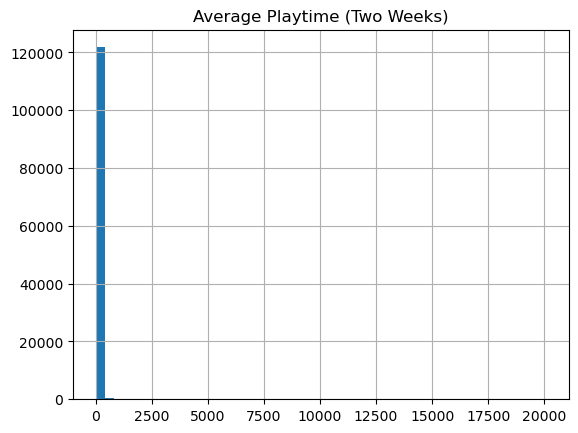

In [80]:
import matplotlib.pyplot as plt

df['average_playtime_two_weeks'].hist(bins=50)
plt.title("Average Playtime (Two Weeks)")

Text(0.5, 1.0, 'Average Playtime (Lifetime)')

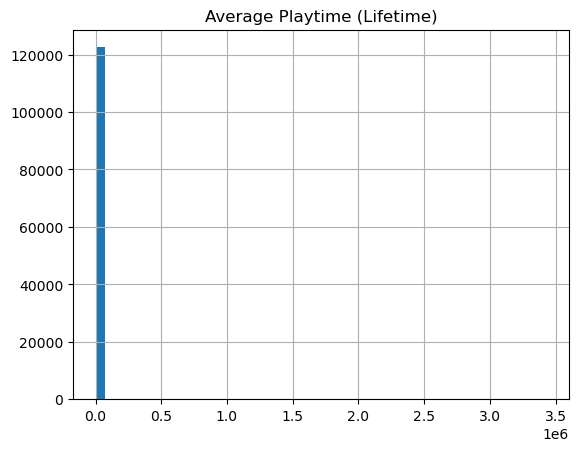

In [81]:
df['average_playtime_forever'].hist(bins=50)
plt.title("Average Playtime (Lifetime)")

The histograms show a massive right skew. Most games have nearly zero early playtime and a few games have enormous lifetime playtime (this was expected). This suggest the use of log tranformation later on.

Text(0.5, 1.0, 'Early vs Lifetime Playtime')

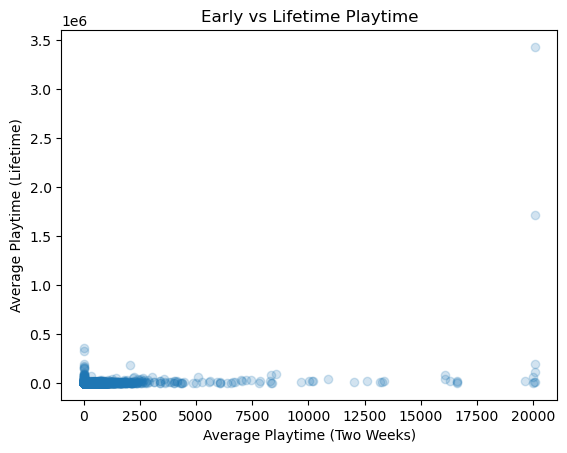

In [82]:
plt.scatter(
    df['average_playtime_two_weeks'],
    df['average_playtime_forever'],
    alpha=0.2
)
plt.xlabel("Average Playtime (Two Weeks)")
plt.ylabel("Average Playtime (Lifetime)")
plt.title("Early vs Lifetime Playtime")

There is dense cluster near zero early playtime, extreme vertical outliers in liftime, and funnel-shaped dispersion.The relationship is non linear because of many low early / low lifetime games and a few extreme outliers. This reinforces the need for log transformation.

Text(0.5, 1.0, 'Log-Transformed Early vs Lifetime Playtime')

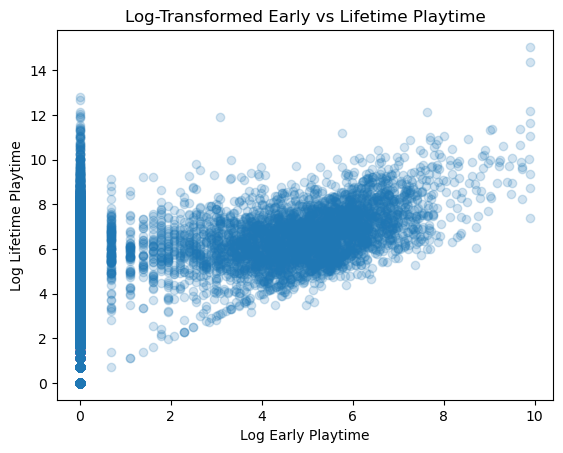

In [83]:
# For insight clarity
import numpy as np

plt.scatter(
    np.log1p(df['average_playtime_two_weeks']),
    np.log1p(df['average_playtime_forever']),
    alpha=0.2
)
plt.xlabel("Log Early Playtime")
plt.ylabel("Log Lifetime Playtime")
plt.title("Log-Transformed Early vs Lifetime Playtime")

### 5. Confirm Hypothesis Feasibility

In [84]:
# test if early engagement correlates with lifetime playtime
df[['average_playtime_two_weeks',
    'average_playtime_forever']].corr()

,average_playtime_two_weeks,average_playtime_forever
average_playtime_two_weeks,1.000000,0.335276
average_playtime_forever,0.335276,1.000000


In [85]:
# test price vs lifetime
df[['price', 'average_playtime_forever']].corr()

,price,average_playtime_forever
price,1.00000,0.00389
average_playtime_forever,0.00389,1.00000


A 0.355 correlation is meaniful and not trivial. It's a good result for my thesis because it suggest early engagement matters, but doesnt explain everything. Other signals likely matter too.

A 0.00389 is effectively zero. This is very interesting because it suggest pricing alone explains almost nothing about long term engagement.

In [86]:
df[['average_playtime_forever', 'median_playtime_forever']].corr()

,average_playtime_forever,median_playtime_forever
average_playtime_forever,1.00000,0.99421
median_playtime_forever,0.99421,1.00000


This is an almost perfect correlation. The average and median playtime are essentially measuring the same signal. The distribution is skewed, but median is not giving a meaningfully different information at the game level.

## Week 2 — Structured Code Plan

### Reconfirm Distributions (Raw + Log)

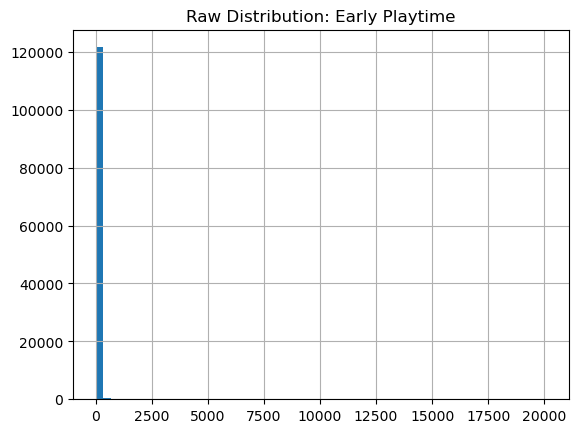

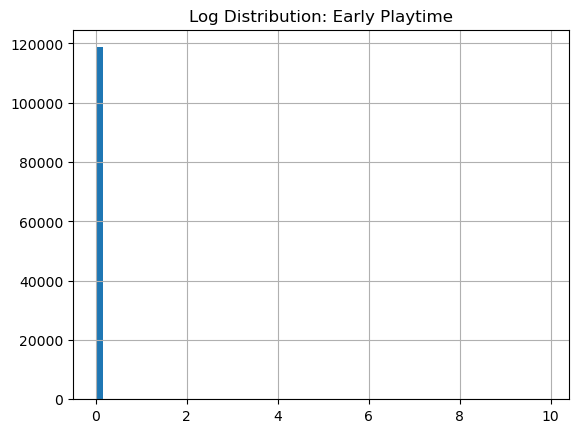

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Log transforms (safe for zeros)
df['log_avg_playtime_two_weeks'] = np.log1p(df['average_playtime_two_weeks'])
df['log_avg_playtime_forever'] = np.log1p(df['average_playtime_forever'])

# Raw distribution
plt.figure()
df['average_playtime_two_weeks'].hist(bins=60)
plt.title("Raw Distribution: Early Playtime")
plt.show()

# Log distribution
plt.figure()
df['log_avg_playtime_two_weeks'].hist(bins=60)
plt.title("Log Distribution: Early Playtime")
plt.show()

In [88]:
df[['average_playtime_two_weeks',
    'average_playtime_forever']].skew()

average_playtime_two_weeks     51.677987
average_playtime_forever      262.897766
dtype: float64

Both early and lifetime playtime are extremely skewed. Most games have very little engagement, while a small number of games have very high engagement. This creates a long right tail in the raw distributions. After applying a log transformation, the extreme values are compressed and the distribution becomes easier to interpret, but there is still a strong concentration of games near zero.

These results confirm that engagement is not evenly distributed across games and that log transformation will be necessary for modeling. The large spike near zero also suggests that many games receive little or no early engagement, which may require special consideration in later analysis.

## Investigate Zero-Inflation

In [89]:
# Percent of games with exactly 0 early playtime

zero_rate = (df["average_playtime_two_weeks"] == 0).mean()
print(f"Percent of games with - early playtime: {zero_rate:.2%}")

Percent of games with - early playtime: 96.82%


In [90]:
# Percent of games with very low early playtime

under_10 = (df["average_playtime_two_weeks"] < 10).mean()
under_60 = (df["average_playtime_two_weeks"] < 60).mean()

print(f"Percent of games with < 10 minutes early playtime: {under_10:.2%}")
print(f"Percent of games with < 60 minutes early playtime: {under_60:.2%}")

Percent of games with < 10 minutes early playtime: 97.19%
Percent of games with < 60 minutes early playtime: 97.90%


In [91]:
# Compare lifetime engagement for zero vs non-zero early playtime

df["early_zero_flag"] = (df["average_playtime_two_weeks"] == 0)

zero_vs_nonzero = df.groupby("early_zero_flag")["average_playtime_forever"].agg(
    count="count",
    mean="mean",
    median="median",
    p75 = lambda s: s.quantile(0.75),
    p90 = lambda s: s.quantile(0.90)
)

zero_vs_nonzero.index = ["Early > 0", "Early = 0"]
zero_vs_nonzero

,count,mean,median,p75,p90
Early > 0,3898,3308.326834,682.0,1533.75,3701.0
Early = 0,118713,106.223219,0.0,0.00,171.0


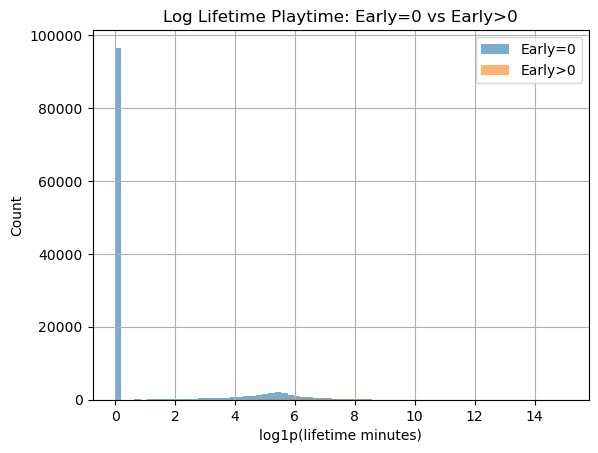

In [92]:
# visual (log lifetime by zero vs non-zero early)

plt.figure()
df.loc[df["early_zero_flag"], "log_avg_playtime_forever"].hist(bins=60, alpha=0.6, label="Early=0")
df.loc[~df["early_zero_flag"], "log_avg_playtime_forever"].hist(bins=60, alpha=0.6, label="Early>0")
plt.title("Log Lifetime Playtime: Early=0 vs Early>0")
plt.xlabel("log1p(lifetime minutes)")
plt.ylabel("Count")
plt.legend()
plt.show()

The vast majority of games receive almost no early engagement. Approximately 97% of games have fewer than 10 minutes of playtime in the first two weeks, and nearly 98% have fewer than 60 minutes. This confirms that early engagement is extremely sparse and concentrated among a very small subset of games.

When comparing lifetime engagement, games with any measurable early engagement show dramatically higher long-term playtime than those with zero early engagement. Most games with zero early engagement accumulate little to no lifetime playtime, while games with positive early engagement average substantially higher long-term engagement.

These findings suggest that early engagement may act as a structural threshold for long-term success. Rather than being smoothly distributed, engagement appears to follow a “few winners, many inactive” pattern.

### Early Engagement Quartiles

In [93]:
# Create Quartiles
# Rank early playtime to break ties

early_rank = df['average_playtime_two_weeks'].rank(method="first")

df['early_quartile'] = pd.qcut(
    early_rank,
    q=4,
    labels=["Q1 (Lowest)", "Q2", "Q3", "Q4 (Highest)"]
)

df['early_quartile'].value_counts()

early_quartile
Q1 (Lowest)     30653
Q2              30653
Q4 (Highest)    30653
Q3              30652
Name: count, dtype: int64

In [94]:
# Compare Lifetime Engagement Across Quartiles

quartile_summary = df.groupby('early_quartile')['average_playtime_forever'].agg(
    count='count',
    mean='mean',
    median='median'
)

quartile_summary

C:\Users\joshu\AppData\Local\Temp\ipykernel_2252\732294273.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_summary = df.groupby('early_quartile')['average_playtime_forever'].agg(


,count,mean,median
early_quartile,,,
Q1 (Lowest),30653,91.586337,0.0
Q2,30653,116.917822,0.0
Q3,30652,131.432827,0.0
Q4 (Highest),30653,492.153394,0.0


C:\Users\joshu\AppData\Local\Temp\ipykernel_2252\1186411857.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('early_quartile')['log_avg_playtime_forever'].mean().plot(kind='bar')


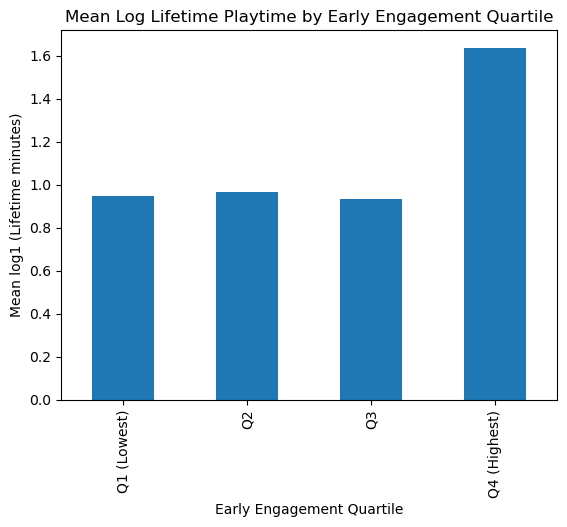

In [95]:
# Visualize Using Log Lifetime

df.groupby('early_quartile')['log_avg_playtime_forever'].mean().plot(kind='bar')
plt.title('Mean Log Lifetime Playtime by Early Engagement Quartile')
plt.ylabel('Mean log1 (Lifetime minutes)')
plt.xlabel('Early Engagement Quartile')
plt.show()

Lifetime engagement increases across early engagement quartiles, but the pattern is not evenly distributed. The lowest three quartiles (Q1–Q3) show relatively small differences in average lifetime playtime (approximately 92 to 131 minutes). However, the highest quartile (Q4) shows a substantial jump, with an average lifetime playtime of approximately 492 minutes.

Importantly, the median lifetime playtime remains zero across all quartiles. This indicates that even within higher early engagement groups, most games still accumulate little long-term engagement, and the higher averages are driven by a subset of strongly performing titles.

Overall, this suggests that early engagement is meaningful, but its impact is concentrated among top-performing games rather than evenly distributed across all games.

This pattern suggests:
- The relationship is not smooth or linear.
- The top quartile drives most of the long-term engagement signal.
- This may favor:
    - Tree-based models
    - Threshold-based features
    - Possibly modeling top performers separately

### Log-Log Relationship (Nonlinearity Check)

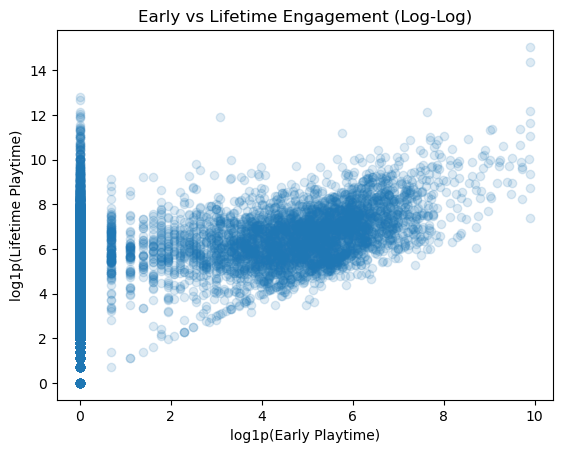

In [96]:
# Scatter Plot (Log-Log)

plt.figure()
plt.scatter(
    df["log_avg_playtime_two_weeks"],
    df["log_avg_playtime_forever"],
    alpha=0.15
)
plt.title("Early vs Lifetime Engagement (Log-Log)")
plt.xlabel("log1p(Early Playtime)")
plt.ylabel("log1p(Lifetime Playtime)")
plt.show()

In [97]:
# Correlation on Log Scale

df[["log_avg_playtime_two_weeks",
    "log_avg_playtime_forever"]].corr()

,log_avg_playtime_two_weeks,log_avg_playtime_forever
log_avg_playtime_two_weeks,1.000000,0.423332
log_avg_playtime_forever,0.423332,1.000000


After applying a log transformation, the relationship between early and lifetime engagement becomes clearer and more structured. The correlation increases from approximately 0.33 (raw scale) to 0.42 on the log scale, indicating a stronger and more stable relationship once extreme outliers are compressed.

The scatter plot shows a generally upward trend: games with higher early engagement tend to have higher lifetime engagement. However, the relationship is not perfectly linear. There is still visible spread, particularly at lower levels of early engagement, and a large vertical cluster at zero early playtime remains.

These results suggest that early engagement is meaningfully associated with long-term engagement, but the relationship is not purely linear. Log transformation improves interpretability, and modeling approaches that can handle some nonlinearity may perform better than a simple linear model.

### Early Signals vs Lifetime Engagement

In [98]:
# Correlation Table (Log Scale)

df["log_peak_ccu"] = np.log1p(df["peak_ccu"])
df["log_positive"] = np.log1p(df["positive"])
df["log_negative"] = np.log1p(df["negative"])
df["log_recommendations"] = np.log1p(df["recommendations"])

signal_corr = df[
    [
        "log_avg_playtime_forever",
        "log_peak_ccu",
        "log_positive",
        "log_negative",
        "log_recommendations"
    ]
].corr()

signal_corr

,log_avg_playtime_forever,log_peak_ccu,log_positive,log_negative,log_recommendations
log_avg_playtime_forever,1.000000,0.148166,0.694448,0.720785,0.754207
log_peak_ccu,0.148166,1.000000,0.177323,0.204296,0.207043
log_positive,0.694448,0.177323,1.000000,0.910085,0.704922
log_negative,0.720785,0.204296,0.910085,1.000000,0.709576
log_recommendations,0.754207,0.207043,0.704922,0.709576,1.000000


In [99]:
df.columns

Index(['appid', 'name', 'release_date', 'estimated_owners', 'peak_ccu',
       'required_age', 'price', 'discountdlc_count', 'about_the_game',
       'supported_languages', 'full_audio_languages', 'reviews',
       'header_image', 'website', 'support_url', 'support_email', 'windows',
       'mac', 'linux', 'metacritic_score', 'metacritic_url', 'user_score',
       'positive', 'negative', 'score_rank', 'achievements', 'recommendations',
       'notes', 'average_playtime_forever', 'average_playtime_two_weeks',
       'median_playtime_forever', 'median_playtime_two_weeks', 'developers',
       'publishers', 'categories', 'genres', 'tags', 'screenshots', 'movies',
       'log_avg_playtime_two_weeks', 'log_avg_playtime_forever',
       'early_zero_flag', 'early_quartile', 'log_peak_ccu', 'log_positive',
       'log_negative', 'log_recommendations'],
      dtype='object')

In [100]:
# Isolate Just the Correlation with Lifetime

signal_corr["log_avg_playtime_forever"].sort_values(ascending=False)

log_avg_playtime_forever    1.000000
log_recommendations         0.754207
log_negative                0.720785
log_positive                0.694448
log_peak_ccu                0.148166
Name: log_avg_playtime_forever, dtype: float64

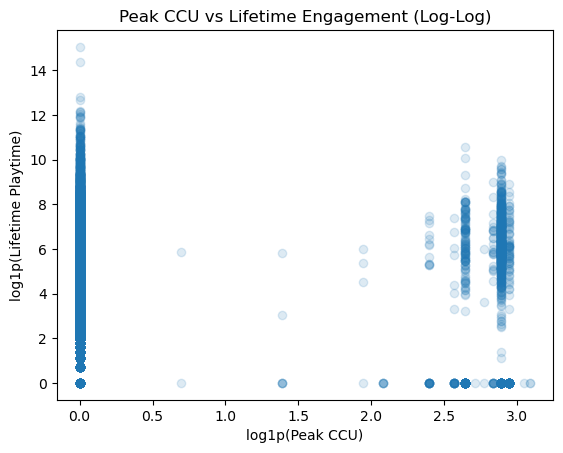

In [101]:
# Visual Check
# Peak CCU:

plt.figure()
plt.scatter(df["log_peak_ccu"], df["log_avg_playtime_forever"], alpha=0.15)
plt.title("Peak CCU vs Lifetime Engagement (Log-Log)")
plt.xlabel("log1p(Peak CCU)")
plt.ylabel("log1p(Lifetime Playtime)")
plt.show()

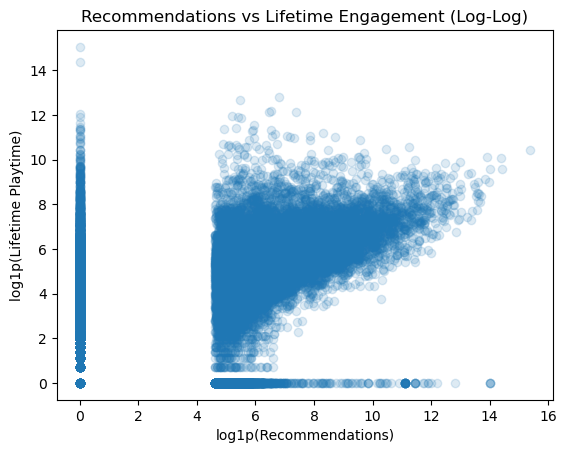

In [102]:
# Recommendations:

plt.figure()
plt.scatter(df["log_recommendations"], df["log_avg_playtime_forever"], alpha=0.15)
plt.title("Recommendations vs Lifetime Engagement (Log-Log)")
plt.xlabel("log1p(Recommendations)")
plt.ylabel("log1p(Lifetime Playtime)")
plt.show()


Among the early signals examined, recommendations show the strongest association with lifetime engagement (r ≈ 0.75), followed by negative reviews (r ≈ 0.72) and positive reviews (r ≈ 0.69). In contrast, peak CCU shows a much weaker relationship with lifetime engagement (r ≈ 0.15).

Compared to early two-week playtime (which had a log-scale correlation of approximately 0.42), review-based signals appear to be substantially stronger predictors of long-term engagement. This suggests that social validation and player feedback metrics may capture sustained interest more effectively than short-term usage alone.

The scatter plots reinforce this pattern. Recommendations show a clear upward trend with lifetime engagement, while peak CCU appears more clustered and less consistently related to long-term outcomes.

Overall, these results suggest that behavioral and community-based signals may be stronger indicators of long-term engagement than early playtime or peak concurrency alone.

### Engagement by Genre

In [103]:
# Identify Most Common Genre Labels

top_genres = df["genres"].value_counts().head(10)
top_genres

genres
Casual,Indie              6700
Action,Indie              5679
Action,Adventure,Indie    5159
Adventure,Indie           4311
Adventure,Casual,Indie    3610
Action,Casual,Indie       3422
Casual                    3351
Indie                     3075
Action                    2954
Casual,Indie,Strategy     2250
Name: count, dtype: int64

In [104]:
# Filter to Top 10 for Stability

df_top_genres = df[df["genres"].isin(top_genres.index)]

In [105]:
# Compare Lifetime Engagement

genre_summary = df_top_genres.groupby("genres")["average_playtime_forever"].agg(
    count="count",
    mean="mean",
    median="median"
).sort_values("mean", ascending=False)

genre_summary

,count,mean,median
genres,,,
Action,2954,188.399458,0.0
"Adventure,Casual,Indie",3610,92.067590,0.0
"Adventure,Indie",4311,87.229413,0.0
"Action,Indie",5679,83.259377,0.0
"Action,Adventure,Indie",5159,81.903664,0.0
"Casual,Indie,Strategy",2250,71.582667,0.0
"Casual,Indie",6700,70.207910,0.0
"Action,Casual,Indie",3422,47.756283,0.0
Indie,3075,45.328130,0.0


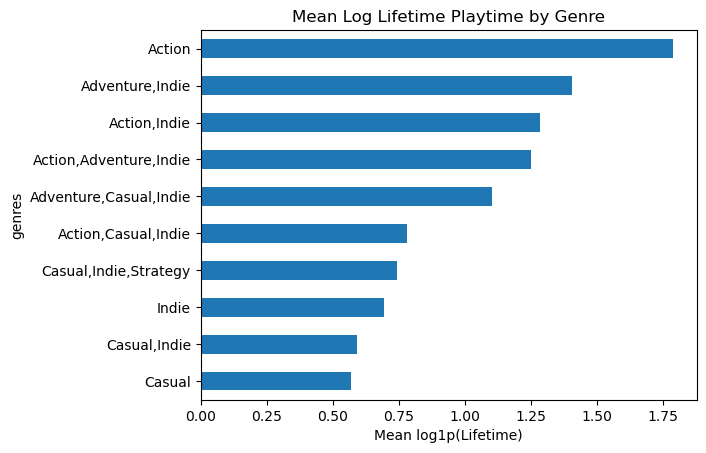

In [106]:
# Visualize on Log Scale

df_top_genres.groupby("genres")["log_avg_playtime_forever"].mean().sort_values().plot(kind="barh")
plt.title("Mean Log Lifetime Playtime by Genre")
plt.xlabel("Mean log1p(Lifetime)")
plt.show()

Lifetime engagement varies across genre combinations, but the differences are not evenly distributed. The "Action" category shows the highest average lifetime engagement (approximately 188 minutes), while combinations such as "Casual" or "Indie" show substantially lower average lifetime engagement.

However, the median lifetime playtime is zero across all genre groups. This indicates that most games, regardless of genre, accumulate little long-term engagement. The higher averages in some genres are driven by a subset of strongly performing titles rather than broad-based engagement across the category.

Overall, genre appears to influence engagement at the top end of performance, but it does not fundamentally change the underlying long-tail structure of the data.

Note:
The genres column contains comma-separated multi-genre combinations, not single genres. So right now we are analyzing full combinations (e.g., "Adventure,Casual,Indie"), not individual genres like “Action” or “Indie” independently. It's okay for EDA, but later we might want to parse them.

### Engagement by Price Range

In [107]:
# Create Price Bins

df["price_bin"] = pd.cut(
    df["price"],
    bins=[-1, 0, 10, 30, 60, 100, np.inf],
    labels=["Free", "1-10", "11-30", "31-60", "61-100", "100+"]
)

df["price_bin"].value_counts()

price_bin
Free      81930
31-60     17185
61-100    15737
11-30      7165
1-10        594
100+          0
Name: count, dtype: int64

In [108]:
# Compare Lifetime Engagement by Price Bin

price_summary = df.groupby("price_bin")["average_playtime_forever"].agg(
    count="count",
    mean="mean",
    median="median"
)

price_summary

C:\Users\joshu\AppData\Local\Temp\ipykernel_2252\770573978.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_summary = df.groupby("price_bin")["average_playtime_forever"].agg(


,count,mean,median
price_bin,,,
Free,81930,174.869742,0.0
1-10,594,232.441077,0.0
11-30,7165,286.290998,0.0
31-60,17185,249.769276,0.0
61-100,15737,298.483002,0.0
100+,0,NaN,NaN


C:\Users\joshu\AppData\Local\Temp\ipykernel_2252\3943780575.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("price_bin")["log_avg_playtime_forever"].mean().plot(kind="bar")


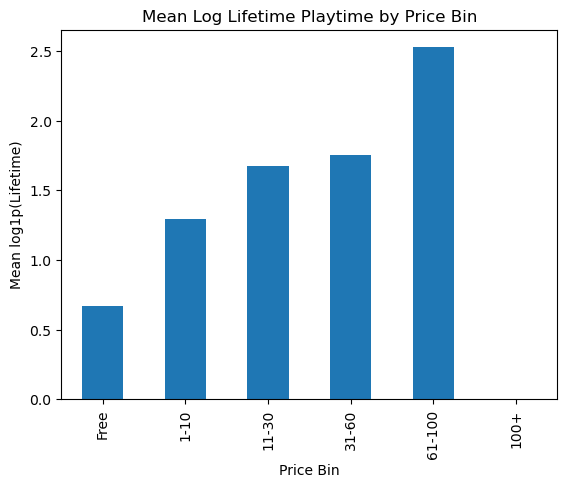

In [109]:
# Visualize Using Log Lifetime

df.groupby("price_bin")["log_avg_playtime_forever"].mean().plot(kind="bar")
plt.title("Mean Log Lifetime Playtime by Price Bin")
plt.ylabel("Mean log1p(Lifetime)")
plt.xlabel("Price Bin")
plt.show()

Lifetime engagement varies across price tiers, but the differences are not dramatic. Free games show an average lifetime playtime of approximately 175 minutes, while mid- to higher-priced games (11–30, 31–60, and 61–100) show higher averages, ranging roughly from 250 to 300 minutes.

However, the median lifetime playtime remains zero across all price bins. This indicates that most games, regardless of price, accumulate little long-term engagement. The higher averages in certain price tiers are driven by a smaller number of highly engaged titles.

Overall, price does not appear to be a primary driver of engagement. While higher-priced games show slightly higher average playtime, the long-tail structure remains consistent across tiers.

## WEEK 3 - STRATEGIC STRUCTURE MODELING

### Finalize the Modeling Dataset

In [124]:
# Recreate all modeling-ready log variables

import numpy as np

# Targets
df["target_log_lifetime"] = np.log1p(df['average_playtime_forever'])
df['log_early'] = np.log1p(df['average_playtime_two_weeks'])

# Behavioral Signs
df['log_peak_ccu'] = np.log1p(df['peak_ccu'])
df["log_recommendations"] = np.log1p(df["recommendations"])

# Combine reviews to reduce multicollinearity
df['total_reviews'] = df['positive'] + df['negative']
df['log_total_reviews'] = np.log1p(df['total_reviews'])

# Binary early flag (for two-stage test)
df['early_nonzero'] = (df['average_playtime_two_weeks'] > 0).astype(int)

In [125]:
# Parse Genres Properly

df['genres'] = df['genres'].fillna("")

genre_dummies = df['genres'].str.get_dummies(sep=',')

# keep genres appearing in at least 500 games
genre_counts = genre_dummies.sum()
major_genres = genre_counts[genre_counts > 500].index

genre_dummies = genre_dummies[major_genres]

df = pd.concat([df, genre_dummies], axis=1)

len(major_genres)

14

In [131]:
# Define Final Baseline Feature Set

baseline_features = [
    "log_early",
    "log_peak_ccu",
    "log_recommendations",
    "log_total_reviews"
] + list(major_genres)

In [137]:
# Remove duplicate columns (found duplicates when I transcribed below)
df = df.loc[:, ~df.columns.duplicated()]

In [138]:
# Build Modeling Dataset

model_df = df[baseline_features + ["target_log_lifetime", "early_nonzero"]].dropna()

model_df.shape

(122611, 20)

### Multicollinearity & Feature Stability Diagnostics

In [140]:
model_df.describe().T

,count,mean,std,min,25%,50%,75%,max
log_early,122611.0,0.148106,0.875249,0.0,0.0,0.000000,0.000000,9.907928
log_peak_ccu,122611.0,0.029346,0.287267,0.0,0.0,0.000000,0.000000,3.091042
log_recommendations,122611.0,1.098941,2.509647,0.0,0.0,0.000000,0.000000,15.390451
log_total_reviews,122611.0,2.455683,2.463158,0.0,0.0,2.079442,3.912023,15.991975
Action,122611.0,0.376965,0.484628,0.0,0.0,0.000000,1.000000,1.000000
Adventure,122611.0,0.368164,0.482308,0.0,0.0,0.000000,1.000000,1.000000
Casual,122611.0,0.409506,0.491745,0.0,0.0,0.000000,1.000000,1.000000
Design & Illustration,122611.0,0.004730,0.068615,0.0,0.0,0.000000,0.000000,1.000000
Early Access,122611.0,0.090457,0.286836,0.0,0.0,0.000000,0.000000,1.000000
Free To Play,122611.0,0.099273,0.299030,0.0,0.0,0.000000,0.000000,1.000000


**Structural Observtions**

Engagement variables remain extremely Zero-Heavy
- log_early = 0
- target_log_lifetime = 0
- early_nonzero mean = 0.0318
  - This mean approximately 3.2% of games have any early engagement at all.

This confirms:
  - Severe zero-inflation
  - Strong canidate for two-stage modeling

**Early Engagement is Extremely Sparse**

log_early:
- Mean = 0.148
- 75th percentile = 0
- Max ≈ 9.91

So:
- 75% of games have zero early playtime.
This reinforces structural sparsity in the target pipeline.

**Review Signals Show Real Variability**

log_total_reviews:
- Median ≈ 2.08 (≈ 7 reviews in raw scale)
- 75th percentile ≈ 3.91 (≈ 50 reviews)

log_recommendations:
- Median = 0
- But large upper tail
These are likely to be strong predictors.

**Genre Distribution Looks Reasonable**

Examples:
- Indie ≈ 65.8%
- Casual ≈ 40.9%
- Action ≈ 37.7%
- RPG ≈ 17.1%

Binary encoding looks correct.
No sparsity issues except for:
- Utilities
- Design & Illustration
- Massively Multiplayer

In [141]:
# Correlation among numeric predictors only
numeric_predictors = [
    "log_early",
    "log_peak_ccu",
    "log_recommendations",
    "log_total_reviews"
]

model_df[numeric_predictors].corr()

,log_early,log_peak_ccu,log_recommendations,log_total_reviews
log_early,1.000000,0.183093,0.461857,0.361784
log_peak_ccu,0.183093,1.000000,0.207043,0.175946
log_recommendations,0.461857,0.207043,1.000000,0.687388
log_total_reviews,0.361784,0.175946,0.687388,1.000000


**Multicollinearity Snapshot Interpretation**

- No Dangerous Correlations Among Early Signals

**The Only Strong Relationship**

- log_recommendations ↔ log_total_reviews = 0.687
    - Moderately high, but not catastrophic (not > 0.8 or 0.9)
- Interpretation:
    - Recommendations are strongly tied to total reviews (expected)
    - But not perfectly redundant
This is reasonable behavioral overlap.

**Modeling Decision**

Right now, nothing here requires removal. However, because recommendations are a subset of reviews conceptually, in future iterations we may:
- Test models with only log_total_reviews
- Test models with only log_recommendations
- Compare performance

In [147]:
# Formal VIF Test (Variance Inflation Factor)
    # VIF < 5 → Safe
    # VIF 5–10 → Watch carefully
    # VIF > 10 → Remove variable

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = model_df[numeric_predictors].copy()

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

vif_data

,feature,VIF
0,log_early,1.320150
1,log_peak_ccu,1.068014
2,log_recommendations,2.427229
3,log_total_reviews,2.140222


*All VIF values are well below 5. There is no harmful multicollinearity!*

### Build Baseline Model - OLS Regression

In [150]:
import statsmodels.api as sm

# Define X and y
X = model_df[baseline_features]
y = model_df['target_log_lifetime']

# add intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     target_log_lifetime   R-squared:                       0.632
Model:                             OLS   Adj. R-squared:                  0.632
Method:                  Least Squares   F-statistic:                 1.168e+04
Date:                 Tue, 24 Feb 2026   Prob (F-statistic):               0.00
Time:                         12:30:10   Log-Likelihood:            -2.1344e+05
No. Observations:               122611   AIC:                         4.269e+05
Df Residuals:                   122592   BIC:                         4.271e+05
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

**R² = 0.632**

Baseline features explain 63.2% of the variance in log lifetime engagement.
- This is structurally meaningful.

**Do early signals predict lifetime engagement?**

Yes, strongly.

- log_early coef = 0.1993
- p < 0.001
    - A 1-unit increase in log early playtime is associated with a ~0.20 increase in log lifetime playtime.
    - This is a meaningful, statistically strong effect meaning **early engagement matters**.

**Strongest Predictors**

- log_recommendations → 0.456
- log_total_reviews → 0.296
- log_early → 0.199
- log_peak_ccu → -0.218
    - Negative relationship is *interesting*.
    - After controlling for reviews and early playtime, higher peak concurrency is associated with lower long-term engagement.

**Genre Effects**

Positive predictors:

- RPG (+0.117)
- Strategy (+0.117)
- Massively Multiplayer (+0.192)
- Free To Play (+0.165)

Negative predictors:

- Indie (-0.097)
- Action (-0.063)
- Adventure (-0.081)

These are conditional effects, controlling for engagement signals.

### Two-Stage Modeling Framework

In [155]:
# # Logistic Regression

# from statsmodels.api import Logit

# # Stage 1 dataset
# X_stage1 = sm.add_constant(model_df[baseline_features])
# y_stage1 = model_df["early_nonzero"]

# logit_model = Logit(y_stage1, X_stage1).fit()

# print(logit_model.summary())

Ran into a LinAlgError: Singular matrix

- Games with early > 0 vs early = 0
- That creates a singular matrix.

For Stage 1, we're NOT including:

- log_recommendations
- log_total_reviews

In [157]:
# Fixing stage1

stage1_features = [
    'log_peak_ccu'
] + list(major_genres)

X_stage1 = sm.add_constant(model_df[stage1_features])
y_stage1 = model_df['early_nonzero']

logit_model = sm.Logit(y_stage1, X_stage1).fit(maxiter=100)

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.129135
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          early_nonzero   No. Observations:               122611
Model:                          Logit   Df Residuals:                   122595
Method:                           MLE   Df Model:                           15
Date:                Tue, 24 Feb 2026   Pseudo R-squ.:                 0.08360
Time:                        15:59:00   Log-Likelihood:                -15833.
converged:                       True   LL-Null:                       -17278.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.6023      0.036   -101.346      0.000      -3.672      -3.

**Why This Is Theoretically Better**

Reviews are not structural launch characteristics. They are outcomes of engagement.

Including them leaks information.

So this isn’t just a technical fix, it’s a better modeling design.

**What Predicts Getting Early Engagement?**

*Model Fit*

- Pseudo R² = 0.0836
- LLR p-value < 0.001
- Model converged
    - Structural characteristics explain about 8.4% of the variation in whether a game gets early traction.

**Most Important Predictor**

*log_peak_ccu → 0.889 (p < 0.001)*

- Higher peak visibility strongly increases the probability of early engagement.
    - Games that achieve higher concurrency are much more likely to generate early traction.

**Notice:**

Earlier in OLS, peak CCU became negative after controlling for engagement signals.
But here, in Stage 1, it is strongly positive.

**Genre Effects**

*Strong Positive Predictors*

- Action (+0.49)
- RPG (+0.48)
- Strategy (+0.48)
- Simulation (+0.72)
- Massively Multiplayer (+0.58)
- Utilities (+0.49)

These genres are more likely to generate early traction.

*Strong Negative Predictors*

- Casual (-0.62)
- Indie (-0.51)
- Free To Play (-0.38)

Indie and Casual games are less likely to generate early engagement spikes.

**Conceptual Insight**

*Stage 1 (Logit)*

- Who gets early traction?

*Stage 2 (OLS)*

- Among games that get traction, what predicts magnitude?

In [162]:
# Fix Stage 2
    # Stage 2 subset

stage2_df = model_df[model_df['early_nonzero'] == 1]

X_stage2 = sm.add_constant(stage2_df[baseline_features])
y_stage2 = stage2_df['target_log_lifetime']

stage2_model = sm.OLS(y_stage2, X_stage2).fit()

print(stage2_model.summary())

                             OLS Regression Results                            
Dep. Variable:     target_log_lifetime   R-squared:                       0.453
Model:                             OLS   Adj. R-squared:                  0.451
Method:                  Least Squares   F-statistic:                     178.6
Date:                 Tue, 24 Feb 2026   Prob (F-statistic):               0.00
Time:                         16:08:10   Log-Likelihood:                -5442.3
No. Observations:                 3898   AIC:                         1.092e+04
Df Residuals:                     3879   BIC:                         1.104e+04
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

**Among Games That Get Early Traction (n = 3,898)**

*R² = 0.453*

- Among games that successfully generate early engagement, these predictors explain about 45% of the variation in lifetime engagement magnitude.
    - strong for behavioral data.
 
**Key Behavioral Predictors**

*log_early → 0.286 (p < 0.001)*

This effect is now stronger than in the full model (0.199 → 0.286).

- Once a game gains traction, early engagement intensity strongly predicts long-term engagement magnitude.

*log_recommendations → 0.120 (p < 0.001)*

Still positive, but much smaller than in the full OLS.

- Reviews are more important for explaining structural zeros than magnitude among successful games.

*log_total_reviews → 0.067 (p < 0.001)*

Positive but smaller.

*log_peak_ccu → Not significant (p = 0.267)*

In Stage 1:

- Peak CCU strongly predicted getting traction.

In Stage 2:

- Peak CCU does NOT predict long-term magnitude once traction exists.

Visibility drives launch traction, but does not drive sustained engagement depth.

**Genre Effects Shift**

*Strong Positive (Among Successful Games)*

- Utilities (+1.82) — very large
- Free To Play (+0.74)
- Massively Multiplayer (+0.48)
- RPG (+0.35)
- Strategy (+0.28)
- Sports (+0.32)

These genres scale better once they gain traction.

*Negative Effects*

- Indie (-0.40)
- Adventure (-0.18)
- Action (-0.12)

Indie struggles both to gain traction AND to scale retention.

**Stage 1: Who Gets Early Traction?**

- Peak CCU is critical.
- Certain genres structurally favored.
- Indie/Casual disadvantaged.

**Stage 2: Among Those Who Get Traction, Who Scales?**

- Early engagement intensity drives scaling.
- Review depth matters moderately.
- Peak CCU no longer matters.
- Genre plays a different role.

**Why This Is Strong**

We've demonstrated:

- Structural zero-inflation
- Evidence of two distinct behavioral processes
- Different predictors matter at different stages

This is far stronger than a single regression.

**We now have three modeling frameworks**:

1. Single OLS baseline (R² = 0.632)
2. Stage 1 logistic (Pseudo R² = 0.084)
3. Stage 2 OLS (R² = 0.453)

### Train/Test Split + Baseline Linear Regression (sklearn)

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Features + target (single-stage baseline)
X = model_df[baseline_features]
y = model_df['target_log_lifetime']

# Split
X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42
)

# Fit baseline model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
test_r2 = r2_score(y_test, y_pred)
test_rsme = np.sqrt(mean_squared_error(y_test, y_pred))

test_r2, test_rsme

(0.6230896775069193, 1.386183418305432)

**Test Performance Results (Single-Stage Model)**

*Test R² = 0.623*

The model explains 62.3% of the variance in lifetime engagement on unseen test data.

- In-sample R² (statsmodels) = 0.632
- Test R² (sklearn) = 0.623

This tells us:

- The model generalizes well.
- There is minimal overfitting.
- The feature set is stable.

*Test RMSE = 1.386*

The average prediction error is about 1.39 log units.

The key takeaway is:

- The model captures broad structure well.
- Some variability among high-engagement games remains unexplained (expected in behavioral data).